# Fall 2019 CX4641/CS7641 Homework 2

## Instructor: Dr. Mahdi Roozbahani

## Deadline: Oct 8, Tuesday, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged, but each student must write his own answers and explicitly mention any collaborators.

* Homework submission ONLY in .ipynb format.

## Instructions for the assignment

In this assignment, we have both coding and writing questions: you are asked to code and answer them in the cells.

- Graduate students are required to complete all the questions including **bonus parts**. Undergraduate students are welcome to try bonus questions and we will add them on your final grade.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You could directly type the Latex equations in the markdown cell.

- Typing with Latex is highly recommended. An image scan copy of handwritten would work if and only if you upload the images to a public cloud or github and refer them within your ipython notebook using the created url.

## 0 Set up
This notebook is tested under [python 3.6.8](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)

Please implement the functions that has "raise NotImplementedError", and after you finishing the coding, please delete or comment "raise NotImplementedError".

In [1]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm_notebook as tqdm

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

# url for image in KMeans
url = 'https://zbigatron.com/wp-content/uploads/2019/09/grumpy_cat.jpg'

Version information
python: 2.7.15+ (default, Jul  9 2019, 16:51:35) 
[GCC 7.4.0]
matplotlib: 2.2.4
numpy: 1.16.5


## 1. KMeans Clustering [25 + 5pts]

KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K sets: $S = \{S_1, S_2, \ldots, S_K\}$ and each set has $\mu_i$ as its center.




### 1.1 pairwise distance [5pts]

Given $X \in \mathbb{R}^{N x D}$ and $Y \in \mathbb{R}^{M x D}$, obtain the pairwise distance matrix $dist \in \mathbb{R}^{N x M}$ using the euclidean distance metric, where $dist_{i, j} = ||X_i - Y_j||_2$.  

DO NOT USE A FOR LOOP in your implementation -- they are slow and will make your code too slow to pass our grader.  Use array broadcasting instead.

In [2]:
def pairwise_dist(x, y):
    """
    Args:
        x: N x D numpy array
        y: M x D numpy array
    Return:
        dist: N x M array, where dist2[i, j] is the euclidean distance between 
        x[i, :] and y[j, :]
    """
    return (np.sum((x[None,:] - y[:, None])**2, -1)**0.5).T

In [3]:
# TEST CASE
x = np.random.randn(2, 2)
y = np.random.randn(3, 2)

print("*** Expected Answer ***")
print("""==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]""")


print("\n*** My Answer ***")
print("==x==")
print(x)
print("==y==")
print(y)
print("==dist==")
print(pairwise_dist(x, y))

*** Expected Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]

*** My Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]


### 1.2 KMeans Implementation [20pts]

In this section, you are asked to implement the kmeans algorithm. Below is a template which requires you to implement some member functions that haven't been implemented yet.

For the function signature, please see the corresponding doc strings.

In [4]:
class KMeans(object):

    def __init__(self): #No need to implement
        pass

    def _init_centers(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        ind = np.random.choice(len(points),size=K, replace=False)
        return points[ind,:]
        

    def _update_assignment(self, centers, points):
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
       
        return np.argmin(pairwise_dist(points, centers), axis=1)

    def _update_centers(self, old_centers, cluster_idx, points):
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        Note:
            It is possible to have fewer centers after this step.
        """
        
        centers = np.array([points[cluster_idx==k].mean(axis=0) for k in range(old_centers.shape[0])])
        return centers

    def _get_loss(self, centers, cluster_idx, points):
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """
        k = centers.shape[0]
        
        loss = 0
      
        distances_matrix = pairwise_dist(points, centers)
        for i in range(k):
            loss += np.sum(distances_matrix[cluster_idx==i,i])
        return loss
        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss

### 1.3 Pixel Clustering

In this section, you will use your K-Means algorithm to do pixel clustering which compresses the image using K colors.

In [5]:
# helper function for plotting images. You don't have to modify it

def plot_images(img_list, title_list, figsize=(11, 6)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')

In [6]:
# helper function for plotting images. You don't have to modify it

def cluster_pixels_kmeans(image, K):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of clusters
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    cluster_ids, centers, loss = KMeans()(flat_img, K)
    kmeans_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    return kmeans_img

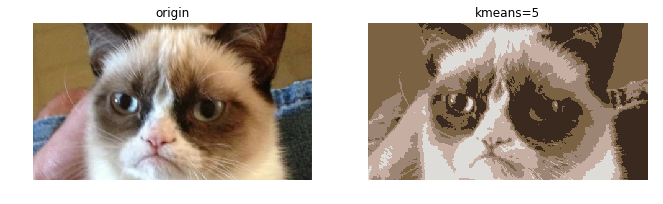

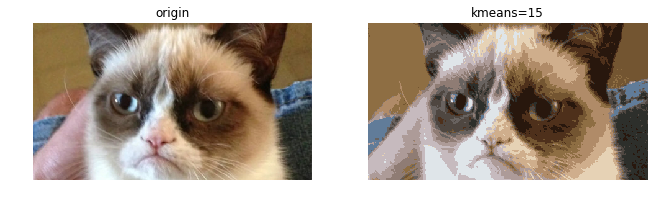

In [7]:
# helper function for plotting images. You don't have to modify it

image = imageio.imread(imageio.core.urlopen(url).read())

kmeans_image_5 = cluster_pixels_kmeans(image, 5)
plot_images([image, kmeans_image_5], ['origin', 'kmeans=5'])

kmeans_image_15 = cluster_pixels_kmeans(image, 15)
plot_images([image, kmeans_image_15], ['origin', 'kmeans=15'])

### 1.4 (Bonus) Find the optimal number of clusters [5pts]

You will now use the elbow method to find the optimal number of clusters to use for pixel clustering the given image.

## Optimal Clusters
The optimal number of clusters is 3

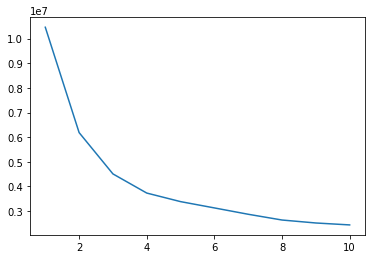

In [8]:
def find_optimal_num_clusters(image, max_K=10):
    """Plots loss values for different number of clusters in K-Means
    
    Args:
        image: input image of shape(H, W, 3)
        max_K: number of clusters
    Return:
        None (plot loss values against number of clusters)
    """

    """
    run a for loop over varying numbers of kmeans and plot the loss of each
    """
   
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    k_array = []
    loss_array = []
    
    for k in range(1, max_K + 1):
        ids, mu, loss = KMeans()(flat_img, k)
        loss_array.append(loss)
        k_array.append(k)
 
    plt.plot(k_array, loss_array)
 

find_optimal_num_clusters(image)

## 2 EM algorithm [20 pts]

EM algorithm is a widely used approach to learning in the presence of unobserved variables. Consider the general framework of the EM alogrithm, given a joint distribution $P(x,z|\theta)$ over observed variables $x$, hidden variable $z$ and its distribution $q(z)$, and governing parameter $\theta$, the goal is to maximize the likelihbood function $P(x|\theta)$ and given the following expression:
    
$$\log P(x|\theta) = \log (\sum_{z}P(x, z|\theta)) = \log (\sum_{z}q(z)\frac{P(x, z|\theta)}{q(z)}) \geq \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)} = \sum_{z}q(z) \log \frac{P(z|x, \theta)P(x|\theta)}{q(z)}$$

The inequality is based on the Jensen's therom.

- Please provide a brief description on how to perform the $E$ step in the above equation.
- Please provide a brief description on how to perform the $M$ step in the above equation.

Suppose

$$F(q,\theta) = \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$$

During the lecture, the expression $\sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$ was explained through the sum of entropy and log-likelihood; the same approach can also be explained using KL-divergence. 

- Please derive that from the above equation (**Hint**: use product rule for joint probability) and explain the what will happen to the KL term in the $E$ step.

### Part 1
The TA I talked to said we only needed to explain the intent of EM for this section

E-step  
This is the expectation step. This means we are calculated the expected values of our model under out initial parameters. In a mathematical notation this is equivalent to determining the probability of the latent (hidden)variable q(z) given the old values of parameters $\theta$ using the below:  

$$q(z) = P(z \mid x, \theta_{old})$$  

We compute this using bayes rule since we know the initial parameters(randomly or in some form initialized) which is of the form:  
$$P(z_nk \mid x, \theta_{old}) = \frac{P(x, \theta_{old} \mid z_nk) P(z_nk)}{\sum_{j=1}^{K} P(z_j) P(x, \theta_{j_{old}} \mid z_j)}$$ 

When looking at GMM our expectation is step is asking what is the probability these points belong to this gaussian assuming out current set of parameters for the gaussian or the responsibility. Or more succintly what is the expected cluster membership. In mathematical notation this is that $P(z_nk)$ translates to $\pi_{k}$ and $P(x, \theta_{old} \mid z_j)$ translates to $N(x_n \mid \mu_j, \Sigma_j)$ or the evaluation of the pdf for a given point for a given component with a certain set of parameters
$$\tau(z_{nk}) = \frac{\pi_k * N(x_n \mid \mu_k,\Sigma_k)}{\sum_{j=1}^{K} \pi_j * N(x_n \mid \mu_j, \Sigma_j)}$$

M-step

Expectation gave us our expected values for our latent variables  maximize our models likelihood of observing our datapoints by optimizing the parameters of our gaussian . In the Maximization-step we re-estimate the parameters to do this. In a mathematial notation this looks like maximizing  ($\theta$) by finding the likelihood function and then optimizing it to find the max:

$$\theta_{new} = argmax_\theta  \sum_{z} q(z) * \ln[p(x,z \mid \theta)]$$

For GMM this is equivalent to finding the parameters of the gaussians that maximize the likelihood of observing the points that had the highest probability of being a part of that gaussian (cluster membership)

### Part 2
We would like to derive the KL term of the form

$-q(z)\frac{q(z)}{P(z|x,\theta_{old})}$

Starting from  

$\sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$

Using the Product rule for joint probability we can say that 

$P(x,z|\theta) = P(z|x, \theta) P(x|\theta)$

Which gives us

$= \sum_z q(z) \log \frac{P(z|x, \theta) P(x|\theta)}{q(z)}$

Using the properties of logs $\log (\frac{a}{b}) = -\log (\frac{b}{a})$ we get

$\sum_{z} -q(z) log \frac{q(z)}{P(z|x, \theta) P(x|\theta)}$ 

now we do some algebra to re-arrange the terms:

$= \sum_z-q(z) \log (\frac{\frac{q(z)}{P(z|x,\theta)}}{P(x|\theta)})$

Using the properties of logs $\log \frac{a}{b} = log(a) - log (b)$ we get

$=\sum_z -q(z) \frac {q(z)}{P(z|x,\theta)} + q(z)log(P(x|\theta))$

In this case the KL-term $-q(z)\frac {q(z)}{P(z|x,\theta)}$ is negative. Which means we need to minimze the KL-term by finding where it is equal to zero. 
This only occurs when $p(z|x,\theta) = q(z)$ So for our E-Step $q(z) = p(z|x,\theta)$ .

## 3. GMM implementation [30 pts]

GMM is trying to do MLE (maximum likelihood estimation). It approximates the distribution of data using a set of gaussian distributions. Here we assume that each gaussian component has diagonal covariance matrix, which makes it easier to calculate the density. 

Given $N$ samples $X = [x_1, x_2, \ldots, x_N]$, we are asked to find $K$ diagonal gaussian distributions to model the data $X$: 

\begin{align}
    \max_{\{\mu_k, \sigma_k\}_{k=1}^K} \sum_{i=1}^N \log \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \sigma_k)\big)
\end{align}

- For undergaduate student: you may assume the covariance matrix is diag matrix, which means the features are independent. (i.e. the red intensity of a pixel is independent from its blue intensity, etc). 
- For graduate student: please assume full covariance matrix.

**Hints**

1. Here $\pi(\cdot)$ is the prior of the latent variable. It is also called the mixture coefficient. To make it simple, we assume $\pi(k) = \frac{1}{K}, \forall k = 1, 2, \ldots, K$.

2. As we create our model, we will need to use a multivariate Gaussian since our pixels are 3-dimensional vectors corresponding to red, green, and blue color intensities.  It means that for each image, you need to convert it into a N*3 matrix, where N is the number of pixels, and 3 is the number of features.

The following example from a machine learning textbook may be helpful:

3. In this question, each pixel has three features, which are R, G, and B.

4. At EM steps, gamma means $\tau\left(z_{n k}\right)$ at our slide of GMM, which is called the responsibility. If we have K components, each data point (pixel) will have K responsibility values.

5. For E steps, we already get the log-likelihood at ll_joint() function. For the fomula at our slide:
$$
\tau\left(z_{n k}\right)=\frac{\pi_{k} N\left(x_{n} | \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} N\left(x_{n} | \mu_{j}, \Sigma_{j}\right)},
$$
ll_joint equals to the $N$ here. Thus, You should be able to finish E steps with just a few lines of code by using ll_joint() and softmax() defined above.

## 3.1 Helper functions

### softmax [5 pts]

Given $logit \in \mathbb{R}^{N x D}$, calculate $prob \in \mathbb{R}^{N x D}$, where $prob_{i, j} = \frac{\exp(logit_{i, j})}{\sum_{k=1}^D exp(logit_{i, k})}$.

Note that it is possible that $logit_{i, j}$ is very large, making $\exp(\cdot)$ of it to explode. To make sure it is numerical stable, you may need to subtract the maximum for each row of $logits$.  As in calculating pairwise distances, DO NOT USE A FOR LOOP.

In [9]:
def softmax(logits):
    """
    Args:
        logits: N x D numpy array
    """
    row_max = np.amax(logits, axis=1).reshape(logits.shape[0], 1)
    exp_res = np.exp(logits - row_max)
    row_sum = np.sum(exp_res, axis=1).reshape(logits.shape[0],1)
    
    return exp_res / row_sum 
    
    
logits = np.array([[1000, 1000], 
                   [1, 2]], dtype=np.float32)
print("""Correct answer:
===softmax===
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]""")

print("My answer:")
print(softmax(logits))

Correct answer:
===softmax===
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]
My answer:
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]


### logsumexp [5 pts]

Given $logit \in \mathbb{R}^{N x D}$, calculate $s \in \mathbb{R}^N$, where $s_i = \log \big( \sum_{j=1}^D \exp(logit_{i, j}) \big)$. Again, pay attention to the numerical problem. You may want to use similar trick as in the softmax function.  DO NOT USE A FOR LOOP.

In [10]:
def logsumexp(logits):
    """
    Args:
        logits: N x D numpy array
    Return:
        s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
    """
    
    row_max = np.amax(logits, axis=1).reshape(logits.shape[0], 1)
    exp_res = np.exp(logits - row_max)
    column_sum = np.sum(exp_res, axis=1).reshape(logits.shape[0],1)

    return(np.log(column_sum)) + row_max
    

logits = np.array([[1000, 1000], 
                   [1, 2]], dtype=np.float32)
print("""Correct Answer:
===logsumexp===
[[1000.6932   ]
 [   2.3132617]]""")

print("My answer: ")
print(logsumexp(logits))

Correct Answer:
===logsumexp===
[[1000.6932   ]
 [   2.3132617]]
My answer: 
[[1000.6932   ]
 [   2.3132617]]


## 3.2 GMM Implementations [20pts]

In [108]:
class GMM(object):
    def __init__(self): # No need to implement
        pass
        
    def _init_components(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
            
        Hint: You could use the K-means results to initial GMM. It will help to converge. 
        For instance, you could use ids, mu = KMeans()(points, K)  to initialize.
        """
        
        pi = np.full(K, 1.0 / K)
        
        cluster_ids, mu, loss = KMeans()(points, K)
        
        sigma = np.random.uniform(40,80,(K,points.shape[1]))
        
        return pi, mu, sigma

        
    def _normal_pdf(self, points, mu, sigma):
        """
        Caculates the probability of each point for a gaussian with parameters given by mu and sigma
        Returns an Nx1 Matrix
        """
        pdf_dim = np.zeros(points.shape)
        
        cov = -1 * ( (points - mu) ** 2 )
        
        
        exponent = np.exp(-1 * ( ( cov ) / (2 * (sigma ** 2)) ) )
        coefficient_lower =  (2 * (np.pi) * (sigma ** 2) ) 
        
        # should come out as a Dx1 or a 3x1
        pdf_dim = (1.0 / np.sqrt(coefficient_lower)) * exponent

        pdf = np.prod(pdf_dim, axis=1)
        
        return pdf
        
    def _ll_joint(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint: Assume that the three dimensions of our multivariate gaussian are independent.  
              This allows you to write treat it as a product of univariate gaussians.
        """
        
        ll = np.zeros((len(points), len(pi)))
        for k in range(len(pi)): 
            ll[:, k] = np.log(self._normal_pdf(points, mu[k], sigma[k])) + np.log(pi[k])
        return ll
        

    def _E_step(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            gamma: Nx K array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        gamma = softmax(self._ll_joint(points, pi, mu, sigma))
        return gamma

    def _M_step(self, points, gamma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian. 
            
        Hint:  There are formulas in the slide.
        """
        
        k = gamma.shape[1]
        d = points.shape[1]
        n_k = np.sum(gamma, axis=0)
        
        
        N = len(points)
        
        mu = np.zeros((k,d))
        pi = np.zeros(k)
        sigma = np.zeros((k,d))
        temp = np.zeros((len(points), d))
        
        ### Starts messing up here
        
        for k in range(len(pi)):
            gamma_k = np.zeros((N,))
            gamma_k[:,] = gamma[:,k]
          
            points_temp = points * np.reshape(gamma_k, (-1,1))

            temp_sum = np.sum(points_temp, axis=0)
            
            mu[k] = temp_sum/n_k[k]

            pi[k] = (float(n_k[k]) )/ float(N)
            
                
            Sig = ( gamma_k * ( (points - mu[k]).T ** 2 )).T
            Sig = np.sum(Sig, axis=0) / n_k[k]
            
            sigma[k] = Sig
            
        print (sigma)
            
        return pi, mu, sigma
            

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxD numpy array), mu and sigma.
        
        Hint: You do not need to change it. For each iteration, we process E and M steps, then 
        """        
        pi, mu, sigma = self._init_components(points, K, **kwargs)
        pbar = tqdm(range(max_iters))
        for it in pbar:
            # E-step
            gamma = self._E_step(points, pi, mu, sigma)
           
        
            # M-step
            pi, mu, sigma = self._M_step(points, gamma)
           
        
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(points, pi, mu, sigma)
            loss = -np.sum(logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            pbar.set_description('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)

In this section, you will use your GMM algorithm to do pixel clustering.

In [109]:
# helper function for plotting images. You don't have to modify it
def cluster_pixels_gmm(image, K):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    gamma, (pi, mu, sigma) = GMM()(flat_img, K=K, max_iters=100)
    cluster_ids = np.argmax(gamma, axis=1)
    centers = mu

    gmm_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    
    return gmm_img

[[3.48670396e+09 2.59453346e+09 1.87646985e+09]
 [3.28277573e+09 2.44264202e+09 1.76655325e+09]
 [1.67431068e+04 1.11339911e+04 7.04022379e+03]
 [2.55609064e+04 2.08317204e+04 1.77550762e+04]
 [3.37572453e+09 2.51167114e+09 1.81605808e+09]]
[[1.56473910e+41 1.16393209e+41 8.41343538e+40]
 [1.02563320e+41 7.62917821e+40 5.51471941e+40]
 [4.07074123e+03 3.89861346e+03 4.43829070e+03]
 [6.44858107e+05 4.80546078e+05 3.48978295e+05]
 [1.24662849e+41 9.27305456e+40 6.70298919e+40]]


/home/collin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in true_divide
/home/collin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


[[           inf            inf            inf]
 [           inf            inf            inf]
 [3.47427144e+03 3.45492759e+03 4.11758892e+03]
 [1.51299884e+18 1.12544521e+18 8.13523460e+17]
 [           inf            inf            inf]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]

[[1.74600092e+06 1.30906718e+06 9.59861194e+05]
 [1.87011295e+09 1.39152718e+09 1.00665682e+09]
 [3.90266696e+06 2.93775366e+06 2.17667453e+06]
 [1.71238659e+09 1.27446717e+09 9.22373090e+08]
 [1.41773787e+09 1.05482916e+09 7.62785639e+08]
 [1.81871153e+05 1.33511811e+05 9.54389931e+04]
 [1.93276731e+05 1.34578223e+05 8.60500642e+04]
 [1.53438039e+06 1.15611027e+06 8.55925263e+05]
 [2.59416606e+09 1.93009411e+09 1.39572050e+09]
 [2.77167913e+07 2.06473971e+07 1.49486693e+07]
 [1.21221857e+09 9.02247538e+08 6.52992688e+08]
 [1.82662780e+08 1.35978844e+08 9.84853349e+07]
 [1.27228232e+09 9.46510276e+08 6.84381988e+08]
 [4.50035258e+09 3.34847339e+09 2.42180149e+09]
 [3.02857353e+05 2.32036481e+05 1.75244911e+05]]
[[4.39847127e+11 3.27180582e+11 2.36501112e+11]
 [6.00843358e+32 4.46937679e+32 3.23067032e+32]
 [1.27420550e+14 9.47818564e+13 6.85126681e+13]
 [3.25071297e+32 2.41804502e+32 1.74787381e+32]
 [8.65301287e+31 6.43654878e+31 4.65263225e+31]
 [3.22473833e+04 2.48578259e+04 1.95885

KeyboardInterrupt: 

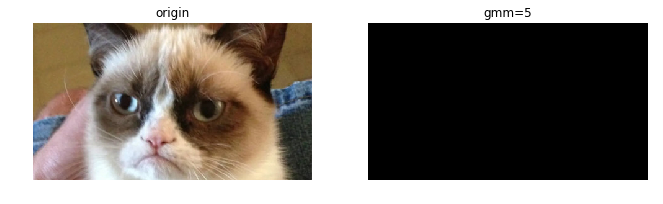

In [110]:
# helper function for plotting images. You don't have to modify it
image = imageio.imread(imageio.core.urlopen(url).read())

gmm_image_5 = cluster_pixels_gmm(image, 5)
plot_images([image, gmm_image_5], ['origin', 'gmm=5'])

gmm_image_15 = cluster_pixels_gmm(image, 15)
plot_images([image, gmm_image_15], ['origin', 'gmm=15'])

## 4 Lagrangian [25 + 5 pts]

Assume in a coordinate $(\theta_1,\theta_2)$ as shown in the image below, for any line that has a slope $ k = 0.5 $, just as the blue lines in this image, we want to find the possible minimum $\theta_2$-intercept of this line. Without a constraint, this minimum $\theta_2$-intercept can go to negative infinity (We just keep moving this line downward). However, if a constraint is added, which requires that this line has to fall on the red ellipse (Analytical form of this area is $\frac{\theta_1^2}{2^2} + \frac{\theta_2^2}{1^2} \leq 1 $), this question will have a unique, bounded solution.

<img src="https://www.dropbox.com/s/ujp3yg7d6tpn0xa/Picture3.png?raw=1" width=700px; />

The above question can be mathmatically formulated as a constrained optimization problem:

$$ \underset{\theta_1,\theta_2}{\text{min   }} f(\theta_1,\theta_2), \quad where \, f(\theta_1,\theta_2) = \theta_1 + 2 \theta_2 $$

$$ \underset{\theta_1,\theta_2}{\text{subject to   }} g(\theta_1,\theta_2) \leq 0, \quad where \, g(x) = \theta_1^2+4 \theta_2^2-4 $$

### 4.1 Write out the Lagrangian function. [5pts]

The Primal problem and the Dual problem are defined as,

Primal problem (The original optimization problem.) : $$ \underset{\theta_1,\theta_2}{\text{min   }} \theta_{\mathcal{P}}(\theta_1,\theta_2) = \underset{\theta_1,\theta_2}{\text{min   }} \underset{\lambda \geq 0}{\text{max   }} f(\theta_1,\theta_2) + \lambda (\theta_1^2 + 4 \theta_2^2 - 4)$$

Dual problem (By shifting the order of $min$ and $max$ in the Primal problem.) : $$ \underset{\lambda \geq 0}{\text{max   }} \theta_{\mathcal{D}}(\lambda) = \underset{\lambda \geq 0}{\text{max   }} \underset{\theta_1,\theta_2}{\text{min   }} f(\theta_1,\theta_2) + \lambda (\theta_1^2 + 4 \theta_2^2 - 4) $$

For this problem, the optimal solution to the Primal and the Dual problems are the same, which is often referred as strong duality. The optimal solution can be found out by meeting the KKT condition.

For this problem the lagrangian function is simply  
$$\mathcal{L}(\theta_1,\theta_2) = \theta_1 + 2\theta_2 + \lambda(\theta_1^2 + 4\theta_2^2 - 4)$$


### 4.2 Write out the KKT conditions of the Lagrangian defined in 4.1. [10 pts]


(1). $ \nabla_{\theta_1,\theta_2} \mathcal{L} = 0 $. (Satisfied at the minimum of $f$.)
Solving for each partial derivative individually and putting them as a system of equations we get  

$$\frac{\partial {\mathcal{L}}}{\partial \theta_1} = -2\lambda \theta_1 - 1 = 0$$
$$\frac{\partial {\mathcal{L}}}{\partial \theta_2} = -8\lambda \theta_2 - 2 = 0$$


(2). $ \lambda g(x) = 0 $. and 3. $ \lambda \geq 0 $. (Therefore, when this condition is met, $ \mathcal{L} = f $.)

When $\lambda \ge 0:$
$$\lambda (\theta_1^2 + 4 \theta_2^2 -4) = 0$$  
Substituting back into the langrangian we get $ L = f + \lambda g(x)$ 
so now it equals $ \lambda g(\theta_1, \theta_2) = f + 0 $

(3). $ g(x) \leq 0 $. (The inequality constraint.)
$$\theta_1^2 + 4 \theta_2^2 - 4 \le 0$$


### 4.3 Solve the optimization problem. [10pts]
(**Hint**: The optimal solution can be found either by solving the KKT conditions or by solving the Dual problem.)

If the constraint is binding then $g(\theta_1,\theta_2) = 0$ and $\lambda \neq 0$ and we setup our system of equations such that

$$\theta_1^2 + 4 * \theta_2^2 - 4 = 0$$
$$-2\lambda \theta_1 - 1 = 0$$
$$-8\lambda \theta_2 - 2 = 0$$

This results in two possible solutions  
$1. (\theta_1, \theta_2, \lambda) = (\sqrt 2, \frac{\sqrt 2}{2}, - \frac{\sqrt 2}{4})$ but this solution doesnt work as we require that $\lambda \ge 0$

$2. (\theta_1, \theta_2, \lambda) = (- \sqrt 2, - \frac{\sqrt 2}{2}, \frac{\sqrt 2}{4})$
  

If the constraint is not binding then $\lambda = 0$ since $g(\theta_1, \theta_2) \neq 0$
$$-2\lambda \theta_1 - 1 = 0$$ But this fails to meet the condition $1 \neq 0$
$$-8\lambda \theta_2 - 2 = 0$$ But this fails to meet the condition because $1 \neq 0$  

Because both equations fail to meet the condition there are no solutions for this case.

### 4.4 Bonus [5 pts]
Will the solution be the same if an equality constraint
$$ \frac{\theta_1^2}{2^2}+\frac{\theta_2^2}{1^2} = 1 $$
is applied on this question? (The constraint is as shown in the picture below)

Please prove it mathematically  

In this case, $g(\theta_1, \theta_2) = 0$ which is equivalent to our binding case of problem 4.3  

Seting up the system of equations for the kkt conditions $g(\theta_1,\theta_2) = 0$ and $\lambda \neq 0$ results in the following system of equations  

$$\theta_1^2 + 4 \theta_2^2 - 4 = 0$$
$$2 \lambda \theta_1 - 1 = 0$$
$$8 \lambda \theta_2 + 2 = 0$$

This results in two possible candidate points:

$(\theta_1, \theta_2, \lambda) = (\sqrt 2, \frac{\sqrt 2}{2}, - \frac{\sqrt 2}{4})$ but this point is invalid because $\lambda \ge 0$ is a KKT condition

$ (\theta_1, \theta_2, \lambda) = (- \sqrt 2, - \frac{\sqrt 2}{2}, \frac{\sqrt 2}{4})$

This is the same solution as we had in the original problem
